In [14]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import powerlaw as pl
import operator

from  scipy.stats import powerlaw

## Part 2 : Investor behaviour

In [15]:
price_df = pd.read_csv("ZEL_Prices.csv")
investors_df = pd.read_csv("ZEL_Investors.csv")
P=price_df['close']
I=investors_df['position']

In [16]:
price_df


,id_price,date,close,open,max,min,volume
0,1,2000-01-03,3.60,3.58,3.64,3.52,1318820
1,2,2000-01-04,3.46,3.58,3.61,3.41,367385
2,3,2000-01-05,3.33,3.38,3.40,3.24,441030
3,4,2000-01-07,3.46,3.36,3.48,3.36,207440
4,5,2000-01-10,3.42,3.50,3.50,3.40,251485
...,...,...,...,...,...,...,...
1959,1960,2007-10-10,7.71,7.95,8.05,7.67,2554307
1960,1961,2007-10-11,7.83,7.69,7.92,7.67,1511764
1961,1962,2007-10-12,7.77,7.76,7.85,7.72,458365
1962,1963,2007-10-15,7.96,7.89,8.21,7.84,3323438


In [17]:
investors_df

,investor_id,date,position
0,18433,2000-01-03,0.0
1,18433,2000-01-04,0.0
2,18433,2000-01-05,0.0
3,18433,2000-01-07,0.0
4,18433,2000-01-10,0.0
...,...,...,...
155151,744,2007-10-10,0.0
155152,744,2007-10-11,0.0
155153,744,2007-10-12,0.0
155154,744,2007-10-15,0.0


In [18]:
# Period of investment
T=len(price_df)
# Number of investors 
N=int(len(investors_df)/len(price_df))
pos= np.array(investors_df['position'])


In [19]:
difference = [(np.diff(pos[i:i+T])) for i in range (N)]

retur = np.diff(price_df['open'])

correl = [np.corrcoef(difference[i],retur)[0,1] for i in range(N)]


classification = {}
for i in range(N):
    id= investors_df['investor_id'].iloc[i*T]
    if correl[i]<-0.01 : 
        classification[id] = "reversion"
    elif correl[i]>0.01 : 
        classification[id] = "trend following"
    else : 
        classification[id] = "neutral"

print(classification)
rev,tf,n = operator.countOf(classification.values(),'reversion'),operator.countOf(classification.values(),'trend following'),operator.countOf(classification.values(),'neutral')
print(rev,tf,n)
    

{18433: 'reversion', 18427: 'trend following', 18333: 'neutral', 18322: 'neutral', 18321: 'neutral', 18317: 'neutral', 18232: 'neutral', 18228: 'neutral', 17930: 'neutral', 17542: 'neutral', 16942: 'reversion', 16818: 'neutral', 16511: 'neutral', 15950: 'neutral', 15858: 'neutral', 15594: 'neutral', 15588: 'neutral', 15330: 'neutral', 15158: 'neutral', 15103: 'neutral', 14968: 'reversion', 14963: 'trend following', 14950: 'neutral', 14653: 'neutral', 14503: 'neutral', 14450: 'neutral', 13785: 'neutral', 13342: 'neutral', 13341: 'neutral', 13330: 'neutral', 13303: 'neutral', 11716: 'neutral', 11586: 'neutral', 11013: 'neutral', 10966: 'neutral', 10782: 'neutral', 10571: 'neutral', 10515: 'neutral', 10359: 'neutral', 10200: 'neutral', 10157: 'neutral', 9163: 'neutral', 9060: 'reversion', 8684: 'neutral', 8625: 'neutral', 8553: 'neutral', 8239: 'neutral', 8234: 'neutral', 8085: 'neutral', 7936: 'neutral', 7916: 'neutral', 7304: 'neutral', 6960: 'neutral', 6873: 'neutral', 6647: 'neutral',

In [20]:
duree = int(T/2)
retur1, retur2  = np.diff(price_df['open'].iloc[:duree]), np.diff(price_df['open'].iloc[duree:])


diff1 = [(np.diff(pos[i:i+duree])) for i in range (N)]
diff2 = [(np.diff(pos[i+duree:i+T])) for i in range (N)]

correl1 = [np.corrcoef(diff1[i],retur1)[0,1] for i in range(N)]
correl2 = [np.corrcoef(diff2[i],retur2)[0,1] for i in range(N)]

class1= {}
for i in range(N):
    id= investors_df['investor_id'].iloc[i*T]
    if correl1[i]<-0.01 : 
        class1[id] = "reversion"
    elif correl1[i]>0.01 : 
        class1[id] = "trend following"
    else : 
        class1[id] = "neutral"


class2= {}
for i in range(N):
    id= investors_df['investor_id'].iloc[i*T]
    if correl2[i]<-0.01 : 
        class2[id] = "reversion"
    elif correl2[i]>0.01 : 
        class2[id] = "trend following"
    else : 
        class2[id] = "neutral"




rev1,tf1,n1 = operator.countOf(class1.values(),'reversion'),operator.countOf(class1.values(),'trend following'),operator.countOf(class1.values(),'neutral')
transition = np.zeros((3,3))
#lines= [reversion, tf, neutral]
# Creating the transition matrix
for key in class1 : 
    if class1[key]== 'reversion' and class2[key]=='reversion':
        transition[0,0]+=1
    elif class1[key]== 'reversion' and class2[key]=='trend following':
        transition[1,0]+=1
    elif class1[key]== 'reversion' and class2[key]=='neutral':
        transition[2,0]+=1
    elif class1[key]== 'trend following' and class2[key]=='reversion':
        transition[0,1]+=1
    elif class1[key]== 'trend following' and class2[key]=='trend following':
        transition[1,1]+=1
    elif class1[key]== 'trend following' and class2[key]=='neutral':
        transition[2,1]+=1
    elif class1[key]== 'neutral' and class2[key]=='reversion':
        transition[0,2]+=1
    elif class1[key]== 'neutral' and class2[key]=='trend following':
        transition[1,2]+=1
    elif class1[key]== 'neutral' and class2[key]=='neutral':
        transition[2,2]+=1 
    
transition[:,0]*=1/rev1
transition[:,1]*=1/tf1
transition[:,2]*=1/n1


print(transition)




    




[[0.07692308 0.         0.05454545]
 [0.07692308 0.09090909 0.03636364]
 [0.84615385 0.90909091 0.90909091]]


We create two ways of computing the value invested by the investors. 

In m, we consider the maximum value invested at a given time. 
In n, we consider the mean value invested

In [21]:



m=[0 for i in range(N)]
n=[[] for i in range(N)]
for i in range(N):
  for t in range(T):
    
    l=i*T + t
    m1 = P[t]*I[l]
    m[i]= max(m[i],m1)
    if m !=0:
      n[i].append(m1)


  n[i]= np.mean(np.abs(n[i]))



In [22]:
mypl=pl.Fit(np.array(m))
c= mypl.alpha
print(c)

mypl=pl.Fit(np.array(n))
d= mypl.alpha
print(d)


2.1623322703174357
1.9928240298981241


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/Users/paulfaverjon/miniforge3/envs/finance/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


/var/folders/57/_nkrw5g16dsdmygf08scq6b00000gn/T/ipykernel_17887/3572626082.py:5: RuntimeWarning: divide by zero encountered in power
  res = np.multiply(np.power(proba.x, 1-c),10**3)


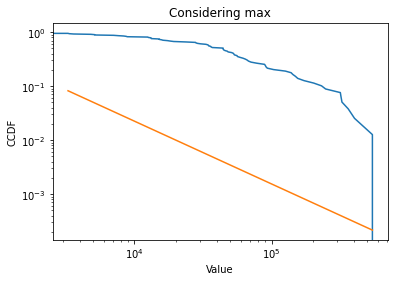

/var/folders/57/_nkrw5g16dsdmygf08scq6b00000gn/T/ipykernel_17887/3572626082.py:19: RuntimeWarning: divide by zero encountered in power
  res = np.multiply(np.power(proba.x, 1-c),10**3)


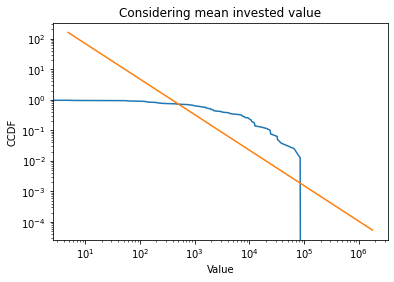

In [23]:
from statsmodels.distributions.empirical_distribution import ECDF
retur = np.abs(m)
proba = ECDF(retur)
plt.plot(proba.x, 1-proba.y)
res = np.multiply(np.power(proba.x, 1-c),10**3)
plt.plot(proba.x, res)
plt.xscale('log')
plt.yscale('log')
plt.title("Considering max")
plt.xlabel("Value")
plt.ylabel("CCDF")
plt.show()



retur = np.abs(n)
proba = ECDF(retur)
plt.plot(proba.x, 1-proba.y)
res = np.multiply(np.power(proba.x, 1-c),10**3)
plt.plot(proba.x, res)
plt.xscale('log')
plt.yscale('log')
plt.title("Considering mean invested value")
plt.xlabel("Value")
plt.ylabel("CCDF")
plt.show()

Number of change of invested volume.

All the investors have exactly the same number of changes

In [24]:
change = np.zeros(N)



for i in range(N): 
    change[i]= sum((x!=0) for x in difference[i])

print(change)


[55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55.
 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55.
 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55.
 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55.
 55. 55. 55. 55. 55. 55. 55.]
